In [13]:
import spacy
print(spacy.info())  # Lists installed models

{'spacy_version': '3.7.5', 'location': '/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/spacy', 'platform': 'macOS-15.3.1-arm64-arm-64bit', 'python_version': '3.12.5', 'pipelines': {'en_core_sci_sm': '0.5.4'}}


In [14]:
#pip install scispacy

In [15]:
#pip install /Users/rudranshrathore/Downloads/en_core_sci_sm-0.5.4

In [16]:
import spacy
nlp = spacy.load("en_core_sci_sm")
print("✅ Model loaded successfully!")

✅ Model loaded successfully!


In [17]:
#python -m spacy link /Users/anjaliaggarwal/Desktop/PATENT/DATASETS/en_core_sci_sm-0.5.4 en_core_sci_sm

In [18]:
import spacy
nlp = spacy.load("en_core_sci_sm")
print("✅ Model loaded successfully!")

✅ Model loaded successfully!


In [19]:
import spacy

try:
    nlp = spacy.load("en_core_sci_sm")
    print("✅ Model loaded successfully!")
except Exception as e:
    print(f"❌ Error: {e}")

✅ Model loaded successfully!


In [20]:
text = "The patient is experiencing severe headache and nausea, which might indicate a possible case of migraine."
doc = nlp(text)

print("Extracted Medical Entities:")
for ent in doc.ents:
    print(f"{ent.text} ({ent.label_})")

Extracted Medical Entities:
patient (ENTITY)
severe (ENTITY)
headache (ENTITY)
nausea (ENTITY)
case (ENTITY)
migraine (ENTITY)


In [21]:
import os
import json
import pandas as pd

# Directory where MedQuAD subfolders are stored
MEDQUAD_DIR = "/Users/rudranshrathore/Downloads/MedQuAD-master/"

def load_medquad(data_dir):
    medquad_data = []
    for subdir in os.listdir(data_dir):  # Iterate through subfolders
        subdir_path = os.path.join(data_dir, subdir)
        if os.path.isdir(subdir_path):  # Check if it's a folder
            for file in os.listdir(subdir_path):
                if file.endswith(".json"):
                    file_path = os.path.join(subdir_path, file)
                    with open(file_path, "r", encoding="utf-8") as f:
                        try:
                            data = json.load(f)
                            for item in data:
                                question = item.get("question", "").strip()
                                answer = item.get("answer", "").strip()
                                medquad_data.append((question, answer))
                        except json.JSONDecodeError:
                            print(f"Error reading {file_path}, skipping...")
    return pd.DataFrame(medquad_data, columns=["Question", "Answer"])

# Load MedQuAD dataset
medquad_df = load_medquad(MEDQUAD_DIR)

# Display first 5 rows
print(medquad_df.head())

Empty DataFrame
Columns: [Question, Answer]
Index: []


In [22]:
import os

MEDQUAD_DIR = "/Users/rudranshrathore/Downloads/MedQuAD-master/"

for subdir in os.listdir(MEDQUAD_DIR):
    subdir_path = os.path.join(MEDQUAD_DIR, subdir)
    if os.path.isdir(subdir_path):
        print(f"📂 Folder: {subdir}")
        for file in os.listdir(subdir_path):
            print(f"  📄 {file}")

📂 Folder: 3_GHR_QA
  📄 0000559.xml
  📄 0000565.xml
  📄 0000203.xml
  📄 0000571.xml
  📄 0000940.xml
  📄 0000798.xml
  📄 0000954.xml
  📄 0000968.xml
  📄 0000983.xml
  📄 0000997.xml
  📄 0000029.xml
  📄 0000001.xml
  📄 0000767.xml
  📄 0000773.xml
  📄 0000015.xml
  📄 0000834.xml
  📄 0000820.xml
  📄 0000808.xml
  📄 0000149.xml
  📄 0000175.xml
  📄 0000613.xml
  📄 0000607.xml
  📄 0000161.xml
  📄 0000388.xml
  📄 0001096.xml
  📄 0001082.xml
  📄 0001055.xml
  📄 0001041.xml
  📄 0000439.xml
  📄 0000411.xml
  📄 0001069.xml
  📄 0000377.xml
  📄 0000363.xml
  📄 0000405.xml
  📄 0000362.xml
  📄 0000404.xml
  📄 0000410.xml
  📄 0000376.xml
  📄 0001068.xml
  📄 0001040.xml
  📄 0000438.xml
  📄 0001054.xml
  📄 0001083.xml
  📄 0001097.xml
  📄 0000389.xml
  📄 0000606.xml
  📄 0000160.xml
  📄 0000174.xml
  📄 0000612.xml
  📄 0000148.xml
  📄 0000809.xml
  📄 0000821.xml
  📄 0000835.xml
  📄 0000772.xml
  📄 0000014.xml
  📄 0000766.xml
  📄 0000996.xml
  📄 0000028.xml
  📄 0000982.xml
  📄 0000969.xml
  📄 0000955.xml
  📄 0

In [11]:
import os
import pandas as pd
import xml.etree.ElementTree as ET

def load_medquad_from_xml(data_dir):
    medquad_data = []
    
    for subdir in os.listdir(data_dir):
        subdir_path = os.path.join(data_dir, subdir)
        if os.path.isdir(subdir_path):  
            for file in os.listdir(subdir_path):
                if file.endswith(".xml"):  # Only process XML files
                    file_path = os.path.join(subdir_path, file)
                    
                    try:
                        tree = ET.parse(file_path)
                        root = tree.getroot()

                        for qa in root.findall(".//QAPair"):  # Adjust if needed
                            question = qa.find("Question")
                            answer = qa.find("Answer")

                            # Ensure question & answer are not None before using .strip()
                            question_text = question.text.strip() if question is not None and question.text else None
                            answer_text = answer.text.strip() if answer is not None and answer.text else None

                            # Only add valid Q&A pairs
                            if question_text and answer_text:
                                medquad_data.append((question_text, answer_text))

                    except ET.ParseError:
                        print(f"❌ Skipping corrupted XML file: {file_path}")

    df = pd.DataFrame(medquad_data, columns=["Question", "Answer"])
    return df

# Load MedQuAD dataset from XML
MEDQUAD_DIR = "/Users/rudranshrathore/Downloads/MedQuAD-master/"
medquad_df = load_medquad_from_xml(MEDQUAD_DIR)

# Display the first 5 rows
print(medquad_df.head())
print(f"✅ Loaded {len(medquad_df)} medical Q&A pairs.")

                                            Question  \
0       What is (are) keratoderma with woolly hair ?   
1  How many people are affected by keratoderma wi...   
2  What are the genetic changes related to kerato...   
3        Is keratoderma with woolly hair inherited ?   
4  What are the treatments for keratoderma with w...   

                                              Answer  
0  Keratoderma with woolly hair is a group of rel...  
1  Keratoderma with woolly hair is rare; its prev...  
2  Mutations in the JUP, DSP, DSC2, and KANK2 gen...  
3  Most cases of keratoderma with woolly hair hav...  
4  These resources address the diagnosis or manag...  
✅ Loaded 16407 medical Q&A pairs.


In [12]:
import spacy
import re
import pandas as pd
from spacy.lang.en.stop_words import STOP_WORDS

# Load SciSpacy model
nlp = spacy.load("en_core_sci_sm")

def clean_text(text):
    """Remove special characters, extra spaces, and lowercase the text."""
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text.lower()

def preprocess_text(text):
    """Tokenize, remove stopwords, and lemmatize text."""
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text not in STOP_WORDS]
    return " ".join(tokens)

# Load MedQuAD Data (assuming 'medquad_df' is the DataFrame)
medquad_df['Question_Cleaned'] = medquad_df['Question'].apply(clean_text).apply(preprocess_text)
medquad_df['Answer_Cleaned'] = medquad_df['Answer'].apply(clean_text).apply(preprocess_text)

# Display preprocessed data
print(medquad_df[['Question_Cleaned', 'Answer_Cleaned']].head(10))
#
## Save preprocessed data
#medquad_df.to_csv("medquad_preprocessed.csv", index=False)
#print("✅ Preprocessing completed and saved!")

KeyboardInterrupt: 

In [23]:
print(medquad_df[['Question_Cleaned', 'Answer_Cleaned']].head(10))

KeyError: "None of [Index(['Question_Cleaned', 'Answer_Cleaned'], dtype='object')] are in the [columns]"

In [24]:
#pip install wordcloud

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

# Check basic statistics
print("Total Questions:", len(medquad_df))
print("Average Question Length:", medquad_df["Question"].apply(lambda x: len(x.split())).mean())
print("Average Answer Length:", medquad_df["Answer"].apply(lambda x: len(x.split())).mean())

# Most common words in questions
word_counts = Counter(" ".join(medquad_df["Question"]).split())
common_words = word_counts.most_common(20)
print("\nMost Common Words in Questions:", common_words)

# Plot Word Cloud for Questions
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(medquad_df["Question"]))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Questions")
plt.show()

Total Questions: 0
Average Question Length: nan
Average Answer Length: nan

Most Common Words in Questions: []


ValueError: We need at least 1 word to plot a word cloud, got 0.

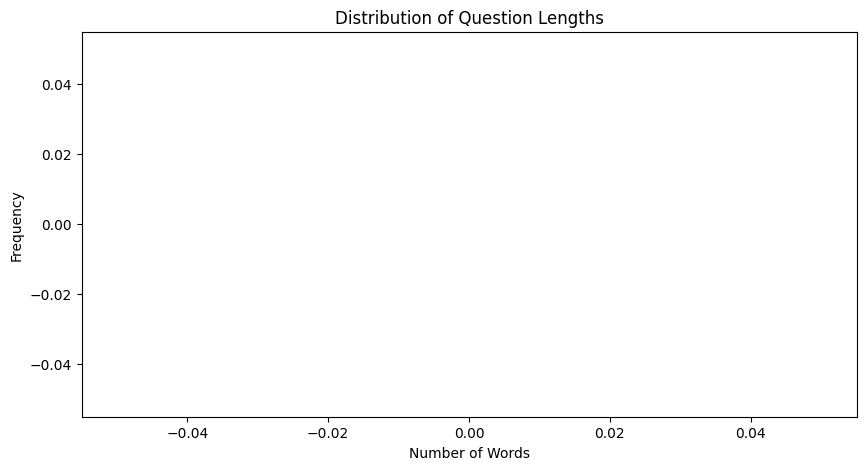

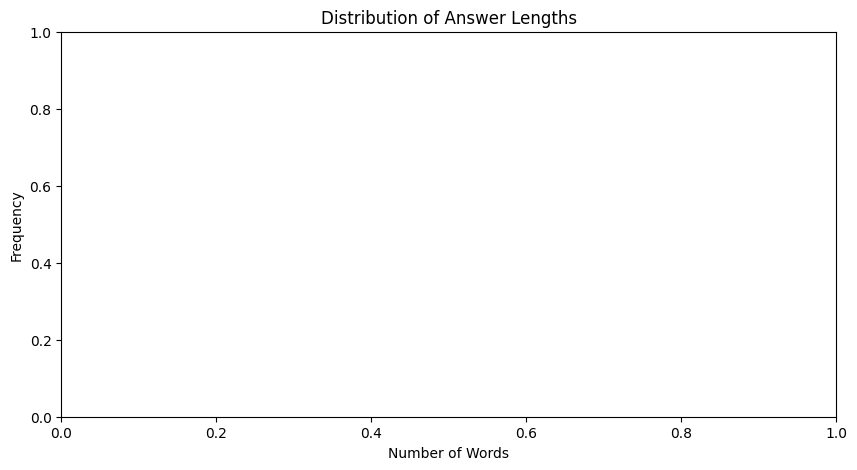

In [26]:
import seaborn as sns

# Question length distribution
medquad_df["question_length"] = medquad_df["Question"].apply(lambda x: len(x.split()))
medquad_df["answer_length"] = medquad_df["Answer"].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
sns.histplot(medquad_df["question_length"], bins=30, kde=True)
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.title("Distribution of Question Lengths")
plt.show()

# Answer length distribution
plt.figure(figsize=(10, 5))
sns.histplot(medquad_df["answer_length"], bins=30, kde=True, color='orange')
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.title("Distribution of Answer Lengths")
plt.show()

In [1]:
import spacy
import re
from nltk.corpus import stopwords

# Load the SciSpaCy model
nlp = spacy.load("en_core_sci_sm")

# Function to clean text
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove numbers
    
    # Tokenization & Lemmatization
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text not in stopwords.words('english') and token.is_alpha]
    
    return " ".join(tokens)

# Apply preprocessing
medquad_df["Cleaned_Question"] = medquad_df["Question"].apply(preprocess_text)
medquad_df["Cleaned_Answer"] = medquad_df["Answer"].apply(preprocess_text)

# Show sample
medquad_df[["Question", "Cleaned_Question", "Answer", "Cleaned_Answer"]].head()

In [2]:
import pandas as pd

# Example: Cleaned questions and answers
cleaned_questions = medquad_df["Cleaned_Question"]
cleaned_answers = medquad_df["Cleaned_Answer"]

# Create a DataFrame
df = pd.DataFrame({"Question": cleaned_questions, "Answer": cleaned_answers})

# Display first few rows
print(df.head())

In [3]:
# Save to CSV (without index column)
df.to_csv("cleaned_medquad.csv", index=False)

print("✅ Data saved successfully to cleaned_medquad.csv")

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # Keep top 5000 features
X_questions = vectorizer.fit_transform(medquad_df["Cleaned_Question"])
X_answers = vectorizer.fit_transform(medquad_df["Cleaned_Answer"])

print("TF-IDF Vector Shape for Questions:", X_questions.shape)
print("TF-IDF Vector Shape for Answers:", X_answers.shape)

In [30]:
import pandas as pd

# Load the dataset (assuming you have a cleaned CSV)
df = pd.read_csv("cleaned_medquad.csv")  # Ensure this file has a "Label" column


# Print column names
print("Available columns in CSV:", df.columns)

Available columns in CSV: Index(['Question', 'Answer'], dtype='object')


In [31]:
from transformers import pipeline

# Load BioBERT model (BioBERT is not available in transformers' default models, so we use a similar one)
classifier = pipeline("zero-shot-classification", model="bert-base-uncased")

# Define all possible medical departments
departments = [
    "Cardiology", "Neurology", "Dermatology", "Endocrinology", 
    "Gastroenterology", "Orthopedics", "Pulmonology", "Nephrology",
    "Oncology", "Ophthalmology", "Hematology", "Rheumatology",
    "Psychiatry", "Urology", "Gynecology", "ENT (Otorhinolaryngology)",
    "Infectious Diseases", "General Surgery", "Pediatrics", "Geriatrics"
]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use mps:0
Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.


In [32]:
import pandas as pd
from transformers import pipeline
from tqdm import tqdm


In [33]:
# Load cleaned MedQuAD data (assumes "Cleaned_Question" column exists)
df = pd.read_csv("cleaned_medquad.csv")
df = df.dropna(subset=["Question"])  # Drop missing values


In [34]:
departments = [
    "Cardiology", "Neurology", "Dermatology", "Endocrinology", 
    "Gastroenterology", "Orthopedics", "Pulmonology", "Nephrology",
    "Oncology", "Ophthalmology", "Hematology", "Rheumatology",
    "Psychiatry", "Urology", "Gynecology", "ENT (Otorhinolaryngology)",
    "Infectious Diseases", "General Surgery", "Pediatrics", "Geriatrics"
]


In [5]:
predicted_labels = []

# tqdm for progress bar
for question in tqdm(df["Question"], desc="Classifying"):
    result = classifier(question, departments)
    predicted_labels.append(result["labels"][0])  # Top predicted label


In [41]:
# Add predicted labels to dataframe
df["Department"] = predicted_labels

# Save auto-labeled dataset
df.to_csv("auto_labeled_medquad.csv", index=False)
print("Saved auto-labeled dataset!")


✅ Saved auto-labeled dataset!


In [6]:
#from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#import seaborn as sns
#import matplotlib.pyplot as plt
#
## Reload the labeled data
#df = pd.read_csv("auto_labeled_medquad.csv")
#
## Vectorize questions
#vectorizer = TfidfVectorizer(max_features=5000)
#X = vectorizer.fit_transform(df["Question"])
#y = df["Department"]
#
## Split and train
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#model = MultinomialNB()
#model.fit(X_train, y_train)
#
## Predict and evaluate
#y_pred = model.predict(X_test)
#print("Classification Report:\n", classification_report(y_test, y_pred))
#print("Accuracy:", accuracy_score(y_test, y_pred))
#
## Confusion matrix
#conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)
#plt.figure(figsize=(12, 8))
#sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=model.classes_, yticklabels=model.classes_, cmap="Blues")
#plt.title("Confusion Matrix")
#plt.xlabel("Predicted")
#plt.ylabel("Actual")
#plt.xticks(rotation=90)
#plt.tight_layout()
#plt.show()
#

In [8]:
#pip install transformers datasets scikit-learn torch


In [9]:
# Count department frequency
value_counts = df["Department"].value_counts()

# Filter out rare departments
df_filtered = df[df["Department"].isin(value_counts[value_counts > 1].index)]

print(f" Remaining samples after filtering: {len(df_filtered)}")


 Remaining samples after filtering: 16404


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_filtered["label"] = label_encoder.fit_transform(df_filtered["Department"])

train_texts, val_texts, train_labels, val_labels = train_test_split(
    df_filtered["Question"].tolist(), df_filtered["label"].tolist(), 
    test_size=0.2, stratify=df_filtered["label"]
)


/var/folders/vk/w595slqx5pj3c95whtkx4mkr0000gn/T/ipykernel_18285/2249692186.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["label"] = label_encoder.fit_transform(df_filtered["Department"])


In [11]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "dmis-lab/biobert-base-cased-v1.1"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(label_encoder.classes_))


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dmis-lab/biobert-base-cased-v1.1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [12]:
from transformers import Trainer, TrainingArguments
from datasets import Dataset

train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)

train_dataset = Dataset.from_dict({
    "input_ids": train_encodings["input_ids"],
    "attention_mask": train_encodings["attention_mask"],
    "labels": train_labels
})

val_dataset = Dataset.from_dict({
    "input_ids": val_encodings["input_ids"],
    "attention_mask": val_encodings["attention_mask"],
    "labels": val_labels
})


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [13]:
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

trainer.train()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss



KeyboardInterrupt



In [ ]:
from sklearn.metrics import classification_report

# Predict on validation set
preds = trainer.predict(val_dataset)
y_true = val_labels
y_pred = preds.predictions.argmax(-1)

# Print classification report
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "emilyalsentzer/Bio_ClinicalBERT"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(label_encoder.classes_))


In [ ]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=512)

from datasets import Dataset

train_dataset = Dataset.from_dict({
    "input_ids": train_encodings["input_ids"],
    "attention_mask": train_encodings["attention_mask"],
    "labels": train_labels
})

val_dataset = Dataset.from_dict({
    "input_ids": val_encodings["input_ids"],
    "attention_mask": val_encodings["attention_mask"],
    "labels": val_labels
})
from sklearn.metrics import accuracy_score
import numpy as np

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    return {"accuracy": accuracy_score(p.label_ids, preds)}



In [30]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics  # Add this line for accuracy tracking
)

training_args = TrainingArguments(
    output_dir="./results_bioclinicalbert",
    evaluation_strategy="epoch",  # Evaluate after every epoch
    save_strategy="epoch",       # Save after every epoch
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs_bioclinicalbert",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy"  # Now this works because we are tracking 'accuracy'
)


In [7]:
#from transformers import Trainer
#
#trainer = Trainer(ˀ
#    model=model,
#    args=training_args,
#    train_dataset=train_dataset,
#    eval_dataset=val_dataset,
#)
#trainer.train()
#

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

preds = trainer.predict(val_dataset)
y_true = val_labels
y_pred = preds.predictions.argmax(-1)

print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))
print("Accuracy:", accuracy_score(y_true, y_pred))
